# [실습] 파이 토치 기본 문법


## 학습 목표
1. 파이토치를 이용한 텐서를 다루는 방법에 대해 익힙니다.
2. 파이토치를 이용한 다양한 모델링 방법에 대해 학습합니다.
3. 파이토치를 이용한 다양한 데이터셋 빌드 과정에 대해 학습합니다.

## 1. 텐서
*   텐서는 파이토치의 가장 기본적인 데이터 구조
*   텐서 = 다차원 배열

### 1-1. 텐서 생성하기

파이토치에서는 리스트나 배열 형태의 데이터를 텐서로 변환하여 다양한 연산을 수행할 수 있습니다.

In [1]:
import torch
# 2차원 형태 list를 이용하여 텐서를 생성할 수 있습니다.
torch.tensor([[1,2],[3,4]])

tensor([[1, 2],
        [3, 4]])

device를 지정하면 GPU에 텐서를 만들 수 있습니다.

In [2]:
torch.tensor([[1,2],[3,4.]], device="cuda:0")

tensor([[1., 2.],
        [3., 4.]], device='cuda:0')

dtype을 이용하여 텐서의 데이터 형태를 지정할 수도 있습니다.

In [3]:
torch.tensor([[1,2],[3,4.]], dtype=torch.float64)

tensor([[1., 2.],
        [3., 4.]], dtype=torch.float64)

### 1-2. 다양한 종류의 텐서
PyTorch는 다양한 자료형의 텐서를 제공합니다. 각 텐서는 특정 데이터 타입의 값을 저장하고, 해당 데이터 타입에 최적화된 연산을 수행할 수 있습니다. 주요 텐서 타입은 다음과 같습니다:

In [4]:
t = torch.FloatTensor([0, 1, 2, 3, 4, 5, 6])
t

tensor([0., 1., 2., 3., 4., 5., 6.])

In [5]:
torch.IntTensor([1, 2, 3])

tensor([1, 2, 3], dtype=torch.int32)

In [6]:
torch.LongTensor([1, 2, 3])

tensor([1, 2, 3])

In [7]:
torch.ByteTensor([1, 0, 1, 0])

tensor([1, 0, 1, 0], dtype=torch.uint8)

### 1-3. 텐서의 차원 및 크기 확인하기

PyTorch에서 텐서의 구조를 파악하는 것은 매우 중요합니다.

 특히, 다양한 연산이나 모델링을 할 때 텐서의 차원과 크기를 알아야 합니다.

`dim()`: 텐서의 차원을 반환합니다. 예를 들어, 1차원 벡터는 1, 2차원 행렬은 2, 3차원 텐서는 3을 반환합니다.
`shape `혹은` size()`: 텐서의 각 차원별 크기를 튜플로 반환합니다. 예를 들어,
2×3 크기의 2차원 텐서의 경우 `(2, 3)`을 반환합니다.
위의 메서드와 속성을 활용하면, 텐서의 구조를 빠르게 확인하고 원하는 형태로 변환 작업을 수행할 수 있습니다.

In [8]:
print(t.dim())  #  차원
print(t.shape)  # shape
print(t.size()) # shape

1
torch.Size([7])
torch.Size([7])


In [11]:
torch.tensor([[1,2],[3,4]]).size()

torch.Size([2, 2])

### 1-4. view : 텐서의 모양 변경하기

`view`는 주어진 텐서의 크기(혹은 모양)를 변경하는 기능을 합니다.
코드는 먼저 3차원의 numpy 배열을 생성하고, 이를 PyTorch의 `FloatTensor`로 변환하는 과정을 보여줍니다.

예제 에서 ft 텐서의 크기는 (2, 2, 3)입니다. 이렇게 차원과 크기를 파악한 뒤, view 메서드를 활용하면 원하는 차원과 크기로 텐서를 쉽게 변환할 수 있습니다.


텐서의 원래 요소의 총 개수와 변환된 후의 요소의 총 개수는 항상 동일해야 합니다.

`[-1, 3]`에서 -1은 특별한 값으로, 해당 차원의 크기는 다른 차원의 크기를 통해 유추되어집니다. 여기서는 `(?, 3)`의 형태로 크기를 변경하라는 의미이며, 실제로 변경된 후의 텐서의 크기는 `(4, 3)`이 됩니다.

In [12]:
#view 매우중요
#dim()을 사용하면 현재 텐서의 차원을 보여줍니다. shape나 size()를 사용하면 크기를 확인할 수 있습니다.
import numpy as np
t = np.array([[[0, 1, 2],
               [3, 4, 5]],
              [[6, 7, 8],
               [9, 10, 11]]])
ft = torch.FloatTensor(t)
ft.shape

torch.Size([2, 2, 3])

In [20]:
# t = np.arange(12).reshape(2,2,3) # same
t = np.arange(12).reshape(-1,2,3)
t

array([[[ 0,  1,  2],
        [ 3,  4,  5]],

       [[ 6,  7,  8],
        [ 9, 10, 11]]])

In [21]:
print(ft.view([-1, 3])) # ft라는 텐서를 (?, 3)의 크기로 변경
print(ft.view([-1, 3]).shape)

tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.]])
torch.Size([4, 3])


### 1-5. squeeze: 차원의 크기가 1인 경우 해당 차원을 제거하기
squeeze 메서드는 텐서의 차원 중 크기가 1인 차원을 제거하는 기능을 합니다. 이 메서드는 딥 러닝 모델링 시, 결과의 차원을 조정해야 할 때나 특정 연산을 적용하기 전 차원을 줄여야 할 때 유용하게 사용됩니다.

In [22]:
#squeeze
ft = torch.FloatTensor([[0], [1], [2]])
print(ft)
print(ft.shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


In [23]:
print(ft.squeeze())
print(ft.squeeze().shape)

tensor([0., 1., 2.])
torch.Size([3])


squeeze 메서드는 텐서의 차원 중 크기가 1인 차원을 제거하는 기능을 합니다. 이 메서드는 딥 러닝 모델링 시, 결과의 차원을 조정해야 할 때나 특정 연산을 적용하기 전 차원을 줄여야 할 때 유용하게 사용됩니다.

In [24]:
ft = torch.Tensor([0, 1, 2])
print(ft)
print(ft.shape)

ft_unsqueeze = ft.unsqueeze(0)  # 0번째 차원에 1을 추가
print(ft_unsqueeze)
print(ft_unsqueeze.shape)

ft_unsqueeze2 = ft.unsqueeze(1)  # 1번째 차원에 1을 추가
print(ft_unsqueeze2)
print(ft_unsqueeze2.shape)

tensor([0., 1., 2.])
torch.Size([3])
tensor([[0., 1., 2.]])
torch.Size([1, 3])
tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


이렇게, unsqueeze 메서드를 사용하여 텐서의 차원을 적절하게 조절함으로써 딥 러닝 모델의 연산을 원활하게 진행할 수 있습니다.







### 1-6. topk: 텐서에서 상위 k개의 값과 그 위치 반환하기

PyTorch의 topk 함수는 텐서에서 가장 큰 k개의 값을 반환하며, 해당 값들의 위치(index)도 함께 반환합니다. 이 함수는 모델 예측의 결과 중 상위 k개의 예측값을 뽑아낼 때나, 특정 조건을 만족하는 상위 k개의 값을 찾을 때 사용됩니다.

In [25]:
#topk
x = torch.arange(1., 6.)
# tensor([ 1.,  2.,  3.,  4.,  5.])
values, indices = torch.topk(x, 3)
print(values)
# tensor([5., 4., 3.])
print(indices)
# tensor([4, 3, 2])

tensor([5., 4., 3.])
tensor([4, 3, 2])


## 2. 파이 토치 관련 유용한 모듈 및 옵션


1. **torchvision**

    torchvision는 이미지 처리에 특화된 도구 및 라이브러리를 제공하는 모듈입니다. 사전 학습된 모델, 일반적인 이미지 데이터셋 등에 대한 액세스를 제공합니다.

2. **nn**

    nn 모듈은 딥러닝 모델 구축에 필요한 다양한 구성 요소와 레이어, 활성화 함수, 손실 함수 등을 포함하고 있습니다.

3. **optim**

    optim 모듈은 다양한 최적화 알고리즘 (예: SGD, Adam)을 제공하여 네트워크의 가중치를 업데이트합니다.

4. **nn.functional (F)**

    torch.nn.functional에는 파라미터가 필요 없는 함수들(예: 활성화 함수, dropout)이 포함되어 있습니다.

5. **DataLoader**

    DataLoader는 배치 학습을 위한 데이터 로딩, 미니 배치 생성 등의 기능을 제공합니다.

6. **datasets**

    datasets는 일반적인 표준 데이터셋에 대한 액세스를 제공합니다 (예: MNIST, CIFAR-10).

7. **transforms**

    transforms는 이미지 및 텐서에 적용할 수 있는 데이터 전처리 및 변환 기능을 제공합니다.

8. **SummaryWriter**

    SummaryWriter는 TensorBoard에 로깅 및 시각화를 위한 인터페이스를 제공합니다.

9. **cudnn**

    cudnn은 NVIDIA cuDNN 라이브러리에 대한 설정 및 인터페이스를 제공합니다. 이 라이브러리는 딥 러닝 연산을 위한 GPU 가속화 기능을 제공합니다.

10. **torchsummary**

    torchsummary의 summary 함수는 모델의 구조와 파라미터 개수를 쉽게 확인할 수 있게 도와줍니다.

11. **torch.onnx**

    torch.onnx는 PyTorch 모델을 ONNX(Open Neural Network Exchange) 형식으로 변환하는 기능을 제공합니다. 이를 통해 다른 딥 러닝 프레임워크와 호환성을 갖게 됩니다.



### 2-1. 다양한 모듈들 임포트 및 축약 표현

In [26]:
# torch 의 유용한 함수들
import torch
import torchvision
import torch.nn as nn  # neural network 모음. (e.g. nn.Linear, nn.Conv2d, BatchNorm, Loss functions 등등)
import torch.optim as optim  # Optimization algorithm 모음, (e.g. SGD, Adam, 등등)
import torch.nn.functional as F  # 파라미터가 필요없는 Function 모음
from torch.utils.data import DataLoader  # 데이터 세트 관리 및 미니 배치 생성을 위한 함수 모음
import torchvision.datasets as datasets  # 표준 데이터 세트 모음
import torchvision.transforms as transforms  # 데이터 세트에 적용 할 수있는 변환 관련 함수 모음
from torch.utils.tensorboard import SummaryWriter  # tensorboard에 출력하기 위한 함수 모음
import torch.backends.cudnn as cudnn  # cudnn을 다루기 위한 값 모음
from torchsummary import summary  # summary를 통한 model의 현황을 확인 하기 위함
import torch.onnx  # model을 onnx 로 변환하기 위함

### 2-2. Seed
Seed는 난수 생성 알고리즘의 시작 숫자입니다. 동일한 Seed 값을 사용하면 동일한 난수 시퀀스가 생성됩니다. 이를 통해 확률적 요소가 포함된 코드의 실행 결과를 예측 가능하게 만듭니다.

In [27]:
seed = 100
# pytorch 내부적으로 사용하는 seed 값 설정
torch.manual_seed(seed)

# cuda를 사용할 경우 pytorch 내부적으로 사용하는 seed 값 설정
torch.cuda.manual_seed(seed)

`torch.manual_seed(seed)`

PyTorch의 CPU 연산을 위한 Seed 값을 설정합니다. 모든 연산에서 사용되는 난수의 기본 Seed를 설정하여 CPU 연산의 일관성을 보장합니다.

`torch.cuda.manual_seed(seed)`

 PyTorch의 GPU 연산을 위한 Seed 값을 설정합니다. GPU 연산에서 사용되는 난수의 기본 Seed를 설정하여 GPU 연산의 일관성을 보장합니다. 만약 여러개의 GPU를 사용한다면, torch.cuda.manual_seed_all(seed)를 사용하여 모든 GPU의 Seed 값을 설정해야 할 수도 있습니다.



### 2-3. GPU 사용 관련 설정
GPU를 효과적으로 사용하는 것은 딥러닝 연산에 큰 도움이 됩니다. GPU 설정과 관련된 기본적인 내용들을 보여주고 있으며, 실제 환경에 맞게 조정하여 사용할 수 있습니다.

In [32]:
import os

# cuda가 사용 가능한 지 확인
torch.cuda.is_available()

# cuda가 사용 가능하면 device에 "cuda"를 저장하고 사용 가능하지 않으면 "cpu"를 저장한다.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 멀티 GPU 사용 시 사용 가능한 GPU 셋팅 관련
# 아래 코드의 "0,1,2"는 GPU가 3개 있고 그 번호가 0, 1, 2 인 상황의 예제입니다.
# 만약 GPU가 5개이고 사용 가능한 것이 0, 3, 4 라면 "0,3,4" 라고 적으면 됩니다.
os.environ["CUDA_VISIBLE_DEVICES"] = "0,1,2"

# 현재 PC의 사용가능한 GPU 사용 갯수 확인
print(torch.cuda.device_count())
# 사용 가능한 device 갯수에 맞춰서 0번 부터 GPU 할당
os.environ["CUDA_VISIBLE_DEVICES"] = ",".join(
    list(map(str, list(range(torch.cuda.device_count()))))
)

# 실제 사용할 GPU만 선택하려면 아래와 같이 입력하면 됩니다. (예시)
os.environ["CUDA_VISIBLE_DEVICES"] = "1, 4, 6"


1


### 2-4 CuDNN 관련 설정
CuDNN 설정은 딥러닝 연산의 효율성과 속도에 큰 영향을 줍니다. 아래 설정은 딥러닝 연산을 최적화하고, 연산 속도를 향상시키기 위한 몇 가지 기본적인 설정 예시입니다.

In [33]:
# cudnn을 사용하도록 설정. GPU를 사용하고 있으면 기본값은 True 입니다.
import torch.backends.cudnn as cudnn
cudnn.enabled = True

# inbuilt cudnn auto-tuner가 사용 중인 hardware에 가장 적합한 알고리즘을 선택하도록 허용합니다.
cudnn.benchmark = True

## 3. DataLoader

*   PyTorch에서는 모델 학습 시 데이터의 배치 관리를 쉽게 도와주는 DataLoader를 제공합니다.
*   DataLoader는 데이터셋과 샘플러를 결합하여 주어진 데이터셋에서 배치만큼 데이터를 뽑아오는 반복 가능한 객체(iterable)를 생성합니다.

*  이를 통해 데이터를 쉽게 셔플하거나 병렬 처리를 할 수 있습니다.

In [34]:
from torch.utils.data import TensorDataset # 텐서데이터셋
from torch.utils.data import DataLoader # 데이터로더
x_train  =  torch.FloatTensor([[73,  80,  75],
                               [93,  88,  93],
                               [89,  91,  90],
                               [96,  98,  100],
                               [73,  66,  70]])
y_train  =  torch.FloatTensor([[152],  [185],  [180],  [196],  [142]])

In [35]:
#dataset 만들
dataset = TensorDataset(x_train, y_train)

In [36]:
dataloader = DataLoader(dataset, batch_size=2, shuffle=True, num_workers=2)

In [37]:
for x , y in dataloader:
    print(x,y)

tensor([[ 93.,  88.,  93.],
        [ 96.,  98., 100.]]) tensor([[185.],
        [196.]])
tensor([[73., 80., 75.],
        [73., 66., 70.]]) tensor([[152.],
        [142.]])
tensor([[89., 91., 90.]]) tensor([[180.]])


## 4. 파이토치를 활용한 선형회귀 연습
선형회귀(Linear Regression)는 머신러닝과 통계에서 기본적으로 사용하는 예측 방법 중 하나입니다. 선형회귀는 데이터 포인트 사이의 선형 관계를 찾는 것을 목표로 합니다. 즉, 주어진 독립 변수(X)에 대한 종속 변수(Y)의 응답을 예측하려고 합니다.

본 챕터를 통해 다음과 같은 내용을 학습하게 됩니다



*   파이토치의 기본 개념들 도구들 연습
*   선형회귀 모델의 구조와 작동 원리 이해
*   파이토치를 사용한 선형회귀 모델의 구현 및 학습
*   다양한 방식의 모델링 방법



### 4-1 데이터 준비
먼저, 선형회귀를 위한 학습 데이터를 준비합니다. 우리가 사용할 데이터는

x와 y 사이에 간단한 선형 관계를 가진다고 가정합니다. 여기서
y=2x 라는 관계를 가진 데이터를 사용합니다.

In [38]:
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

In [39]:
print(x_train)
print(x_train.shape)

tensor([[1.],
        [2.],
        [3.]])
torch.Size([3, 1])


In [40]:
print(y_train)
print(y_train.shape)

tensor([[2.],
        [4.],
        [6.]])
torch.Size([3, 1])


### 4-2 가중치와 편향 초기화

선형회귀의 목표는 주어진 데이터에 대해 가장 잘 맞는 직선을 찾는 것입니다. 이 직선은 y = Wx + b로 표현될 수 있으며, 여기서


**W는 가중치(weight)이고,**


**b는 편향(bias)입니다.**


데이터 학습을 시작하기 전에, 초기의
W와 b 값을 정해줄 필요가 있습니다. 일반적으로는 랜덤 값으로 시작하나, 이 예제에서는 간단히
W를 0으로 시작하겠습니다.

In [41]:
# 가중치와 편향 초기화
# 가중치 W를 0으로 초기화하고 학습을 통해 값이 변경되는 변수임을 명시함.
W = torch.zeros(1, requires_grad=True)
# 가중치 W를 출력
print(W)

tensor([0.], requires_grad=True)


In [42]:
b = torch.zeros(1, requires_grad=True)
print(b)

tensor([0.], requires_grad=True)


### 4-2. 가설(hypothesis) 설정하기
선형 회귀의 핵심은 주어진 x값에 대한 예측값 y를 찾는것 입니다. 이 예측값을 구하기 위해 가설 이라는 함수를 정의합니다 여기서는 간단한 선형 가설을 사용합니다

In [43]:
hypothesis = x_train * W + b
print(hypothesis)

tensor([[0.],
        [0.],
        [0.]], grad_fn=<AddBackward0>)


### 4-3. 비용함수 및 최적화
우리의 목표는 주어진 데이터에 가장 잘 맞는 직선을 찾는 것입니다. 이를 위해 실제값과 예측값 사이의 차이를 계산하는 비용 함수를 정의하게 됩니다. 선형 회귀에서는 주로 평균 제곱 오차(Mean Squared Error, MSE)를 비용 함수로 사용합니다.

**평균 제곱 오차(MSE)**


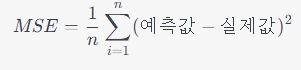


**최적화(optimization)**


선형 회귀의 학습 과정은 결국 이 비용을 최소화하는 가중치 W와 편향 b를 찾는 것입니다. 이를 위해 경사 하강법(Gradient Descent)와 같은 최적화 알고리즘이 사용됩니다. 파이토치에서는 다양한 최적화 알고리즘을 제공하며, 여기서는 SGD(Stochastic Gradient Descent)를 사용하였습니다.

In [44]:
# mse 선언 뒤에서 더 간편하게 만들 수 있는 방법 소개 예정
cost = torch.mean((hypothesis - y_train) ** 2)
print(cost)

tensor(18.6667, grad_fn=<MeanBackward0>)


In [45]:
# optimizer 선언
optimizer = optim.SGD([W, b], lr=0.01)
# gradient를 0으로 초기화
optimizer.zero_grad()
# 비용 함수를 미분하여 gradient 계산
cost.backward()
# W와 b를 업데이트
optimizer.step()

In [46]:
# 학습
nb_epochs = 1999 # 원하는만큼 경사 하강법을 반복
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = x_train * W + b

    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, W.item(), b.item(), cost.item()
        ))

Epoch    0/1999 W: 0.353, b: 0.151 Cost: 14.770963
Epoch  100/1999 W: 1.746, b: 0.577 Cost: 0.047939
Epoch  200/1999 W: 1.801, b: 0.453 Cost: 0.029624
Epoch  300/1999 W: 1.843, b: 0.356 Cost: 0.018306
Epoch  400/1999 W: 1.877, b: 0.280 Cost: 0.011312
Epoch  500/1999 W: 1.903, b: 0.220 Cost: 0.006990
Epoch  600/1999 W: 1.924, b: 0.173 Cost: 0.004319
Epoch  700/1999 W: 1.940, b: 0.136 Cost: 0.002669
Epoch  800/1999 W: 1.953, b: 0.107 Cost: 0.001649
Epoch  900/1999 W: 1.963, b: 0.084 Cost: 0.001019
Epoch 1000/1999 W: 1.971, b: 0.066 Cost: 0.000630
Epoch 1100/1999 W: 1.977, b: 0.052 Cost: 0.000389
Epoch 1200/1999 W: 1.982, b: 0.041 Cost: 0.000240
Epoch 1300/1999 W: 1.986, b: 0.032 Cost: 0.000149
Epoch 1400/1999 W: 1.989, b: 0.025 Cost: 0.000092
Epoch 1500/1999 W: 1.991, b: 0.020 Cost: 0.000057
Epoch 1600/1999 W: 1.993, b: 0.016 Cost: 0.000035
Epoch 1700/1999 W: 1.995, b: 0.012 Cost: 0.000022
Epoch 1800/1999 W: 1.996, b: 0.010 Cost: 0.000013
Epoch 1900/1999 W: 1.997, b: 0.008 Cost: 0.000008

In [47]:
# nn module로 선형회귀
# 모델을 선언 및 초기화. 단순 선형 회귀이므로 input_dim=1, output_dim=1.
model = nn.Linear(1,1)

In [48]:
print(list(model.parameters()))

[Parameter containing:
tensor([[0.3530]], requires_grad=True), Parameter containing:
tensor([0.5078], requires_grad=True)]


In [49]:
# optimizer 설정. 경사 하강법 SGD를 사용하고 learning rate를 의미하는 lr은 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

### 4-4. 모델학습
이제 학습 과정을 살펴 보겠습니다.



1.   에포크(Epoch):
에포크란 전체 훈련 데이터가 학습에 한 번 사용된 주기를 말합니다. 여기서는 총 2000번의 에포크(0 ~ 1999) 동안 학습을 수행하도록 설정했습니다.
2.   예측(Hypothesis):우리의 모델은 입력 x에 가중치 W를 곱하고 편향 b를 더하여 예측값을 계산합니다. 이 예측값은 hypothesis에 저장됩니다.
3.  비용 함수(Cost Function):
이후, 예측된 값 hypothesis와 실제값 y_train 사이의 오차를 평균 제곱 오차로 계산하여 cost에 저장합니다.
4. 최적화(Gradient Descent): 계산된 cost를 사용하여 경사 하강법을 통해 모델의 가중치 W와 편향 b를 업데이트합니다.
5. 로깅(Logging): 마지막으로, 학습 진행 상황을 확인하기 위해 100 에포크마다 W, b 및 cost 값을 출력합니다.



In [50]:
nb_epochs = 2000
for epoch in range(nb_epochs+1):

    # H(x) 계산
    prediction = model(x_train)

    # cost 계산
    cost = F.mse_loss(prediction, y_train) # <== 파이토치에서 제공하는 평균 제곱 오차 함수

    # cost로 H(x) 개선하는 부분
    # gradient를 0으로 초기화
    optimizer.zero_grad()
    # 비용 함수를 미분하여 gradient 계산
    cost.backward() # backward 연산
    # W와 b를 업데이트
    optimizer.step()

    if epoch % 100 == 0:
    # 100번마다 로그 출력
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))

Epoch    0/2000 Cost: 9.571098
Epoch  100/2000 Cost: 0.094508
Epoch  200/2000 Cost: 0.058400
Epoch  300/2000 Cost: 0.036088
Epoch  400/2000 Cost: 0.022300
Epoch  500/2000 Cost: 0.013780
Epoch  600/2000 Cost: 0.008515
Epoch  700/2000 Cost: 0.005262
Epoch  800/2000 Cost: 0.003252
Epoch  900/2000 Cost: 0.002009
Epoch 1000/2000 Cost: 0.001242
Epoch 1100/2000 Cost: 0.000767
Epoch 1200/2000 Cost: 0.000474
Epoch 1300/2000 Cost: 0.000293
Epoch 1400/2000 Cost: 0.000181
Epoch 1500/2000 Cost: 0.000112
Epoch 1600/2000 Cost: 0.000069
Epoch 1700/2000 Cost: 0.000043
Epoch 1800/2000 Cost: 0.000026
Epoch 1900/2000 Cost: 0.000016
Epoch 2000/2000 Cost: 0.000010


### 4-5 모델 예측
학습된 모델을 사용하여 새로운 데이터에 대한 예측을 수행해봅니다.

In [ ]:
# 임의의 입력 4를 선언
new_var =  torch.FloatTensor([[4.0]])
# 입력한 값 4에 대해서 예측값 y를 리턴받아서 pred_y에 저장
pred_y = model(new_var) # forward 연산
# y = 2x 이므로 입력이 4라면 y가 8에 가까운 값이 나와야 제대로 학습이 된 것
print("훈련 후 입력이 4일 때의 예측값 :", pred_y)

이 예제에서는 y = 2x 관계를 가지는 데이터로 모델을 학습시켰기 때문에, 입력값이 4일 때 예측값은 8에 가까운 값이 출력되어야 합니다. 이를 통해 모델이 정상적으로 학습되었음을 알 수 있습니다.

### 4-6. 모델 파라메터 확인
PyTorch의 model.parameters() 메서드를 사용하면, 해당 모델의 모든 파라미터(가중치와 편향)를 확인할 수 있습니다.

In [ ]:
print(list(model.parameters()))

## 5. 파이토치를 활용한 다중 선형회귀 연습

선형 회귀는 종속 변수와 하나 이상의 독립 변수 사이의 관계를 모델링하는 것을 목표로 합니다. 우리는 이미 독립 변수가 하나인 선형 회귀를 살펴보았습니다. 이번 챕터에서는 독립 변수가 두 개 이상인 다중 선형 회귀(multiple linear regression)에 대해 알아보겠습니다.


다중 선형 회귀는 여러 개의 입력 특성을 사용하여 출력을 예측하며, 각 특성에는 그에 해당하는 가중치가 있습니다. 이를 표현할 때는 다음과 같은 수식을 생각할 수 있습니다

y = w1x1 + w2x2+ .. wnxn+b

여기서 x1,x2,xn , w은 각각 독립 변수이며 w 는 가중치 입니다

이 챕터에서는 다중 선형 회귀를 파이토치를 활용하여 구현하고 학습하는 방법을 알아보겠습니다. 특히, 여러 독립 변수들로부터 하나의 출력을 예측하는 방법에 초점을 맞춰 설명하게 됩니다.

### 5-1. 다중 선형회귀 데이터셋 구성

다중 선형 회귀를 구현하기 위해 샘플 데이터를 구성해봅시다.

x_train은 독립 변수 텐서로, 각 행은 하나의 데이터 샘플을 나타내며 각 샘플은 3개의 독립 변수 값을 가지고 있습니다.

반면 y_train은 종속 변수 텐서로 각 샘플의 정답 값을 담고 있습니다.

이 데이터를 활용하여 다중 선형 회귀 모델을 학습시키는 과정을 진행할 예정입니다.

In [51]:
# 다중 선형 회귀 구현
x_train = torch.FloatTensor(
    [[73, 80, 75], [93, 88, 93], [89, 91, 90], [96, 98, 100], [73, 66, 70]]
)
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

### 5-2 모델 정의 및 초기
다중 선형 회귀를 구현하기 위해 모델을 정의합니다.

PyTorch의 `nn.Linear`는 선형 계층을 나타내며, 이 경우 다중 선형 회귀를 위해 `input_dim=3`와 `output_dim=1`을 인자로 전달하였습니다.

 여기서 `input_dim=3`은 세 개의 독립 변수를 나타내며,

`output_dim=1`은 하나의 출력 값을 의미합니다.

In [52]:
model = nn.Linear(3, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[-0.2740, -0.5279, -0.3371]], requires_grad=True), Parameter containing:
tensor([-0.4411], requires_grad=True)]


In [53]:
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)

### 5-3. 학습 시작

주어진 데이터에 대해서 경사 하강법을 사용하여 선형 회귀 모델을 학습합니다.
*  ` prediction = model(x_train)`
모델에 학습 데이터를 전달하여 예측값을 계산합니다. 이 때, model(x_train)은 model.forward(x_train)과 동일한 표현입니다.
*    `cost = F.mse_loss(prediction, y_train)` 예측값과 실제값 간의 차이를 계산하기 위해 평균 제곱 오차(MSE)를 사용합니다. PyTorch는 평균 제곱 오차를 계산하는 함수인 F.mse_loss를 제공합니다.
*   ` optimizer.zero_grad(), cost.backward()` 경사 하강법을 수행하기 전에 미분 값을 0으로 초기화합니다. 그 후, `cost.backward()`를 통해 역전파를 수행하며 가중치와 편향에 대한 미분 값을 계산합니다.
*   `optimizer.step() `계산된 미분 값을 이용하여 파라미터(가중치와 편향)를 업데이트 합니다.



In [54]:
nb_epochs = 2000
for epoch in range(nb_epochs + 1):
    # H(x) 계산
    prediction = model(x_train)
    # model(x_train)은 model.forward(x_train)와 동일함.

    # cost 계산
    cost = F.mse_loss(prediction, y_train)  # <== 파이토치에서 제공하는 평균 제곱 오차 함수

    # cost로 H(x) 개선하는 부분
    # gradient를 0으로 초기화
    optimizer.zero_grad()
    # 비용 함수를 미분하여 gradient 계산
    cost.backward()
    # W와 b를 업데이트
    optimizer.step()

    if epoch % 100 == 0:
        # 100번마다 로그 출력
        print("Epoch {:4d}/{} Cost: {:.6f}".format(epoch, nb_epochs, cost.item()))


Epoch    0/2000 Cost: 72985.664062
Epoch  100/2000 Cost: 0.601515
Epoch  200/2000 Cost: 0.589830
Epoch  300/2000 Cost: 0.578705
Epoch  400/2000 Cost: 0.568106
Epoch  500/2000 Cost: 0.558023
Epoch  600/2000 Cost: 0.548425
Epoch  700/2000 Cost: 0.539282
Epoch  800/2000 Cost: 0.530560
Epoch  900/2000 Cost: 0.522257
Epoch 1000/2000 Cost: 0.514343
Epoch 1100/2000 Cost: 0.506793
Epoch 1200/2000 Cost: 0.499597
Epoch 1300/2000 Cost: 0.492724
Epoch 1400/2000 Cost: 0.486171
Epoch 1500/2000 Cost: 0.479909
Epoch 1600/2000 Cost: 0.473943
Epoch 1700/2000 Cost: 0.468238
Epoch 1800/2000 Cost: 0.462775
Epoch 1900/2000 Cost: 0.457555
Epoch 2000/2000 Cost: 0.452571


In [ ]:
print(list(model.parameters()))

### 5-4. 클래스 기반 모델 구현
PyTorch를 활용해 모델을 클래스 형태로 구현하는 것이 일반적인입니다.

 이는 모델의 구조와 연산을 묶어 표현하기 쉽게 하기 위함입니다.

In [55]:
# 클래스 형태로 구현
class MultivariateLinearRegressionModel(nn.Module): # nn.module을 상속받아서 클래스 정의를 해야 한다
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3, 1)  # 다중 선형 회귀이므로 input_dim=3, output_dim=1.

    def forward(self, x):
        return self.linear(x)

In [56]:
model = MultivariateLinearRegressionModel()

In [57]:
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)

In [58]:
nb_epochs = 2000
for epoch in range(nb_epochs + 1):
    # H(x) 계산
    prediction = model(x_train)
    # model(x_train)은 model.forward(x_train)와 동일함.

    # cost 계산
    cost = F.mse_loss(prediction, y_train)  # <== 파이토치에서 제공하는 평균 제곱 오차 함수

    # cost로 H(x) 개선하는 부분
    # gradient를 0으로 초기화
    optimizer.zero_grad()
    # 비용 함수를 미분하여 gradient 계산
    cost.backward()
    # W와 b를 업데이트
    optimizer.step()

    if epoch % 100 == 0:
        # 100번마다 로그 출력
        print("Epoch {:4d}/{} Cost: {:.6f}".format(epoch, nb_epochs, cost.item()))

Epoch    0/2000 Cost: 27189.396484
Epoch  100/2000 Cost: 7.947201
Epoch  200/2000 Cost: 7.563591
Epoch  300/2000 Cost: 7.200102
Epoch  400/2000 Cost: 6.855614
Epoch  500/2000 Cost: 6.529204
Epoch  600/2000 Cost: 6.219892
Epoch  700/2000 Cost: 5.926751
Epoch  800/2000 Cost: 5.648952
Epoch  900/2000 Cost: 5.385696
Epoch 1000/2000 Cost: 5.136173
Epoch 1100/2000 Cost: 4.899686
Epoch 1200/2000 Cost: 4.675560
Epoch 1300/2000 Cost: 4.463129
Epoch 1400/2000 Cost: 4.261769
Epoch 1500/2000 Cost: 4.070914
Epoch 1600/2000 Cost: 3.890007
Epoch 1700/2000 Cost: 3.718528
Epoch 1800/2000 Cost: 3.555942
Epoch 1900/2000 Cost: 3.401854
Epoch 2000/2000 Cost: 3.255734


### 5-5. 텐서 데이터셋, 데이터 로더로 구현

 큰 데이터를 다룰 때, 전체 데이터를 한번에 처리하기는 힘듭니다. 따라서 데이터를 작은 배치로 나누어 처리하는 것이 일반적입니다. PyTorch는 이를 쉽게 구현할 수 있는 도구를 제공합니다


*   ` TensorDataset : dataset = TensorDataset(x_train, y_train)`
    TensorDataset은 텐서를 입력으로 받아서 데이터셋의 형태로 반환해줍니다. 이 데이터셋은 DataLoader에서 데이터를 배치만큼씩 가져오는 작업을 수행합니

*   `DataLoader`는 TensorDataset에서 정의한 데이터셋을 입력받아 배치 크기에 따라 데이터를 반환하는 반복자(iterator)를 제공합니다.



In [ ]:
# 텐서 데이터셋, 데이터 로더로 구현

from torch.utils.data import TensorDataset # 텐서데이터셋
from torch.utils.data import DataLoader # 데이터로더

x_train  =  torch.FloatTensor([[73,  80,  75],
                               [93,  88,  93],
                               [89,  91,  90],
                               [96,  98,  100],
                               [73,  66,  70]])
y_train  =  torch.FloatTensor([[152],  [185],  [180],  [196],  [142]])

dataset = TensorDataset(x_train, y_train)

dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

In [ ]:
model = nn.Linear(3, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)

In [ ]:
nb_epochs = 20
for epoch in range(nb_epochs + 1):
    for batch_idx, samples in enumerate(dataloader):
        # print(batch_idx)
        # print(samples)
        x_train, y_train = samples
        # H(x) 계산
        prediction = model(x_train)

        # cost 계산
        cost = F.mse_loss(prediction, y_train)

        # cost로 H(x) 계산
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        print(
            "Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}".format(
                epoch, nb_epochs, batch_idx + 1, len(dataloader), cost.item()
            )
        )


### 5-5. 텐서 데이터셋이 아닌 커스텀 데이터 셋
class CustomDataset(torch.utils.data.Dataset):
  def __init__(self):
  데이터셋의 전처리를 해주는 부분

  def __len__(self):
  데이터셋의 길이. 즉, 총 샘플의 수를 적어주는 부분

  def __getitem__(self, idx):
  데이터셋에서 특정 1개의 샘플을 가져오는 함수

In [ ]:
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
# Dataset 상속
class CustomDataset(Dataset):
  def __init__(self):
    self.x_data = [[73, 80, 75],
                   [93, 88, 93],
                   [89, 91, 90],
                   [96, 98, 100],
                   [73, 66, 70]]
    self.y_data = [[152], [185], [180], [196], [142]]

  # 총 데이터의 개수를 리턴
  def __len__(self):
    return len(self.x_data)

  # 인덱스를 입력받아 그에 맵핑되는 입출력 데이터를 파이토치의 Tensor 형태로 리턴
  def __getitem__(self, idx):
    x = torch.FloatTensor(self.x_data[idx])
    y = torch.FloatTensor(self.y_data[idx])
    return x, y

In [ ]:
dataset = CustomDataset()
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

In [ ]:
model = torch.nn.Linear(3, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)

In [ ]:
nb_epochs = 20
for epoch in range(nb_epochs + 1):
    for batch_idx, samples in enumerate(dataloader):
        # print(batch_idx)
        # print(samples)
        x_train, y_train = samples
        # H(x) 계산
        prediction = model(x_train)

        # cost 계산
        cost = F.mse_loss(prediction, y_train)

        # cost로 H(x) 계산
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        print(
            "Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}".format(
                epoch, nb_epochs, batch_idx + 1, len(dataloader), cost.item()
            )
        )


In [ ]:
# 임의의 입력 [73, 80, 75]를 선언
new_var =  torch.FloatTensor([[73, 80, 75]])
# 입력한 값 [73, 80, 75]에 대해서 예측값 y를 리턴받아서 pred_y에 저장
pred_y = model(new_var)
print("훈련 후 입력이 73, 80, 75일 때의 예측값 :", pred_y)